1. We are given data like age and bought_insurance.Apply Logistic Regression Model and predict whether a person takes insurance or not based on his Age.

# Logistic Regression - Binary Classification
2. Import necessary libraries
3. Load the dataset
4. Preprocess the data (handle missing values, if any)
5. Split the dataset into training and testing sets
6. Train the Logistic Regression model
7. Make predictions on the test set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df =  pd.read_csv('/Users/hackthebox/Downloads/Machine-Learning-Self-Study/Logistic_Regression/Data/insurance_data.csv')

In [3]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [21]:
# independent and dependent variables
x = df.iloc[:,:1].values
y = df.iloc[:,1].values

In [22]:
x

array([[22],
       [25],
       [47],
       [52],
       [46],
       [56],
       [55],
       [60],
       [62],
       [61],
       [18],
       [28],
       [27],
       [29],
       [49],
       [55],
       [25],
       [58],
       [19],
       [18],
       [21],
       [26],
       [40],
       [45],
       [50],
       [54],
       [23]])

In [23]:
y

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0])

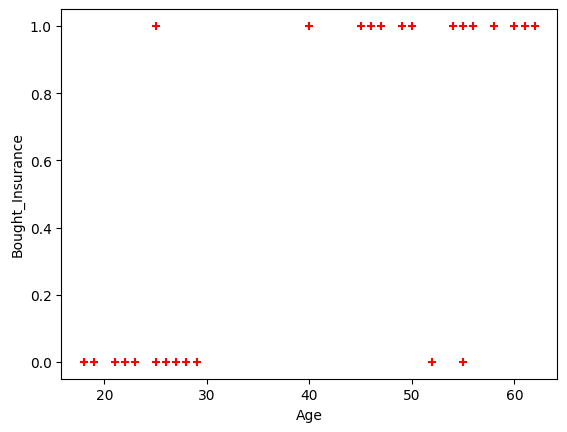

In [24]:
# Displaying the scatter plot
plt.scatter(x, y,marker='+', color='red')
plt.xlabel('Age')
plt.ylabel('Bought_Insurance')
plt.show()

- We can understand that we cannot use a straight line to properly fit all these data points.That means Linear Regression model cannot be used on this data.
- Let us try nowa regression line to fit this data.This can be done using regplot() function available in seaborn package.
- Produced the S shaped regression line to fit the data.

<Axes: xlabel='age', ylabel='bought_insurance'>

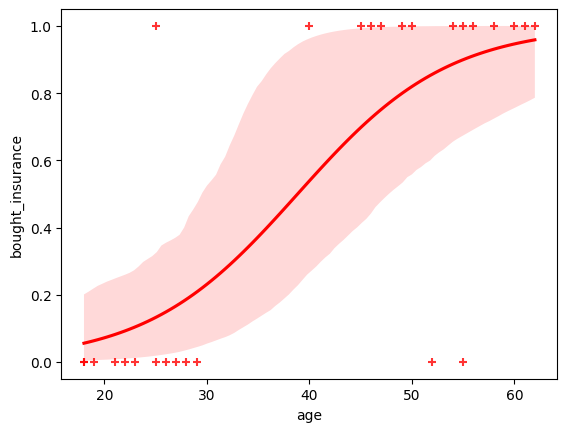

In [25]:
# For the above data,we can not use Linear regression
# show the data as logistic regression plot
import seaborn as sns
sns.regplot(x='age', y='bought_insurance',data=df,marker='+',color='red', logistic=True)

- We can understand that we need Logistic Regression Model that uses S shaped curved line to connect the data points.

- solver - 'liblinear' -> useful for small datasets for binary classification.Apply L1 and L2 penalties.
- solver - 'newton-cholesky' - useful for binary classification .Apply only L2 penalty.
- solver - 'newton-cg','lbfgs','sag' -> useful for multiclass classification.Apply only L2 penalty.Default solver 'lbfgs'
- solver - 'saga' -> useful for multiclass classification.Apply L1 and L2 penalties. 

In [26]:
# Create logistic regression model
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression()

In [28]:
# train the model
model.fit(x,y)

LogisticRegression()

* 0 = 'NO'
* 1 = 'YES'

In [29]:
# Find the accuracy of the model
accuracy = model.score(x, y)
accuracy

0.8888888888888888

In [30]:
# predict if 56 years aged person will buy insurance or not
prediction = model.predict([[56]]) # Yes
prediction

array([1])

In [31]:
# predict if 36 years aged person will buy insurance or not
prediction = model.predict([[36]]) # No
prediction

array([0])

In [32]:
model_1 = LogisticRegression(solver='liblinear')

In [33]:
model_1.fit(x,y)

LogisticRegression(solver='liblinear')

In [34]:
model_1.score(x,y)

0.8888888888888888

- Once the model is trained,we can use predict() method to predict the class (either 0 or 1).
- But there is another method by name predict_proba() that gives an array of probabilities regarding how far the data point comes under the class o or 1. 

In [39]:
y1= model.predict_proba(x)[:,1]
y1

array([0.09257837, 0.13283109, 0.75102456, 0.85587104, 0.72484408,
       0.91078624, 0.89914927, 0.94609576, 0.95835614, 0.95260123,
       0.05601909, 0.18697923, 0.16725268, 0.20845002, 0.79818918,
       0.89914927, 0.13283109, 0.93048761, 0.06362867, 0.05601909,
       0.08180908, 0.14922531, 0.53887788, 0.69702125, 0.81913239,
       0.88618406, 0.10460381])

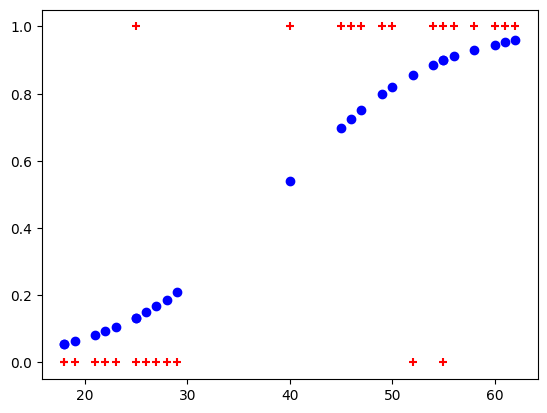

In [40]:
plt.scatter(x,y,marker='+',color='red') # original data
plt.scatter(x,y1,color='blue') # probabilities data
plt.show()